# **Clasificación con Bosques Aleatorios (Random forest)**
UD2. Aprendizaxe Supervisada
MP. Sistemas de Aprendizaxe Automáticos

### **1. Importación de paquetes y dataset**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from math import sqrt
from sklearn.tree import export_graphviz
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

Cargamos el dataset wine incluido en el módulo dataset de scikit-learn. El dataset contiene 13 propiedades de los vinos:

alcohol

malic_acid

ash: Ceniza

alcalinity_of_ash: alcalinidad de las cenizas

magnesium

flavanoids


In [2]:
wine_data = load_wine()
# Creo un Dataframe para visualizar mejor los datos
wine_df = pd.DataFrame(wine_data['data'], columns=wine_data['feature_names'])
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


Al igual que los árboles de decisión, no es necesario regularizar los datos. Aunque el árbol de decisiones puede manejar los missing values, el algoritmo implementado en scikit-learn no soporta missing values por lo que se deben eliminar. En este ejemplo el dataset ya ha sido pre-procesado y no contiene missing values, por lo que podemos particionar directamente el dataset.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
wine_data.data, wine_data.target, stratify=wine_data.target, random_state=42)

## **Creación del clasificador**

Algunos de los parámetros que podemos configurar del clasificador:

* n_estimators: el número de árboles que se van a generar

* criterion: La función empleada para determinar la característica que se escoge en cada nodo para realizar la partición.

    'gini'     -> Impureza

    'entropy'  -> Ganancia de información (Shannon)

    'log_loss' -> Ganancia de información (Shannon)


* max_features: El número de características que empleamos en cada árbol (se eligen de forma aleatoria)
    
    Número absoluto (int)

    Fracción (float)

    'sqrt': sqrt(n_features) (por defecto)

    'log2': log2(n_features)

     None: n_features



* max_samples: El número de muestras que se seleccionan para generar cada árbol (Bootstrap sample).

  None: usa todas las muestras (default)
  value(int): Número de muestras determinado
  value(float): Fracción del número de muestras

También se pueden emplear las técnicas de poda vistas con el árbol de decisiones usando los siguientes parámetros:

* max_deep: Profundidad máxima de los árboles

* min_samples_split: El número de muestras mínimo para seguir bifurcando un nodo.

* min_samples_leaf: El número de muestras mínimo para considerar que el nodo es terminal.




In [4]:
crf = RandomForestClassifier(n_estimators=100, criterion='gini', max_features='sqrt' , max_samples=None, random_state=2)

# **Entrenamiento**

In [5]:
crf.fit(X_train, y_train)

RandomForestClassifier(random_state=2)

# **Informe de clasificación**

Visualización de los árboles creados

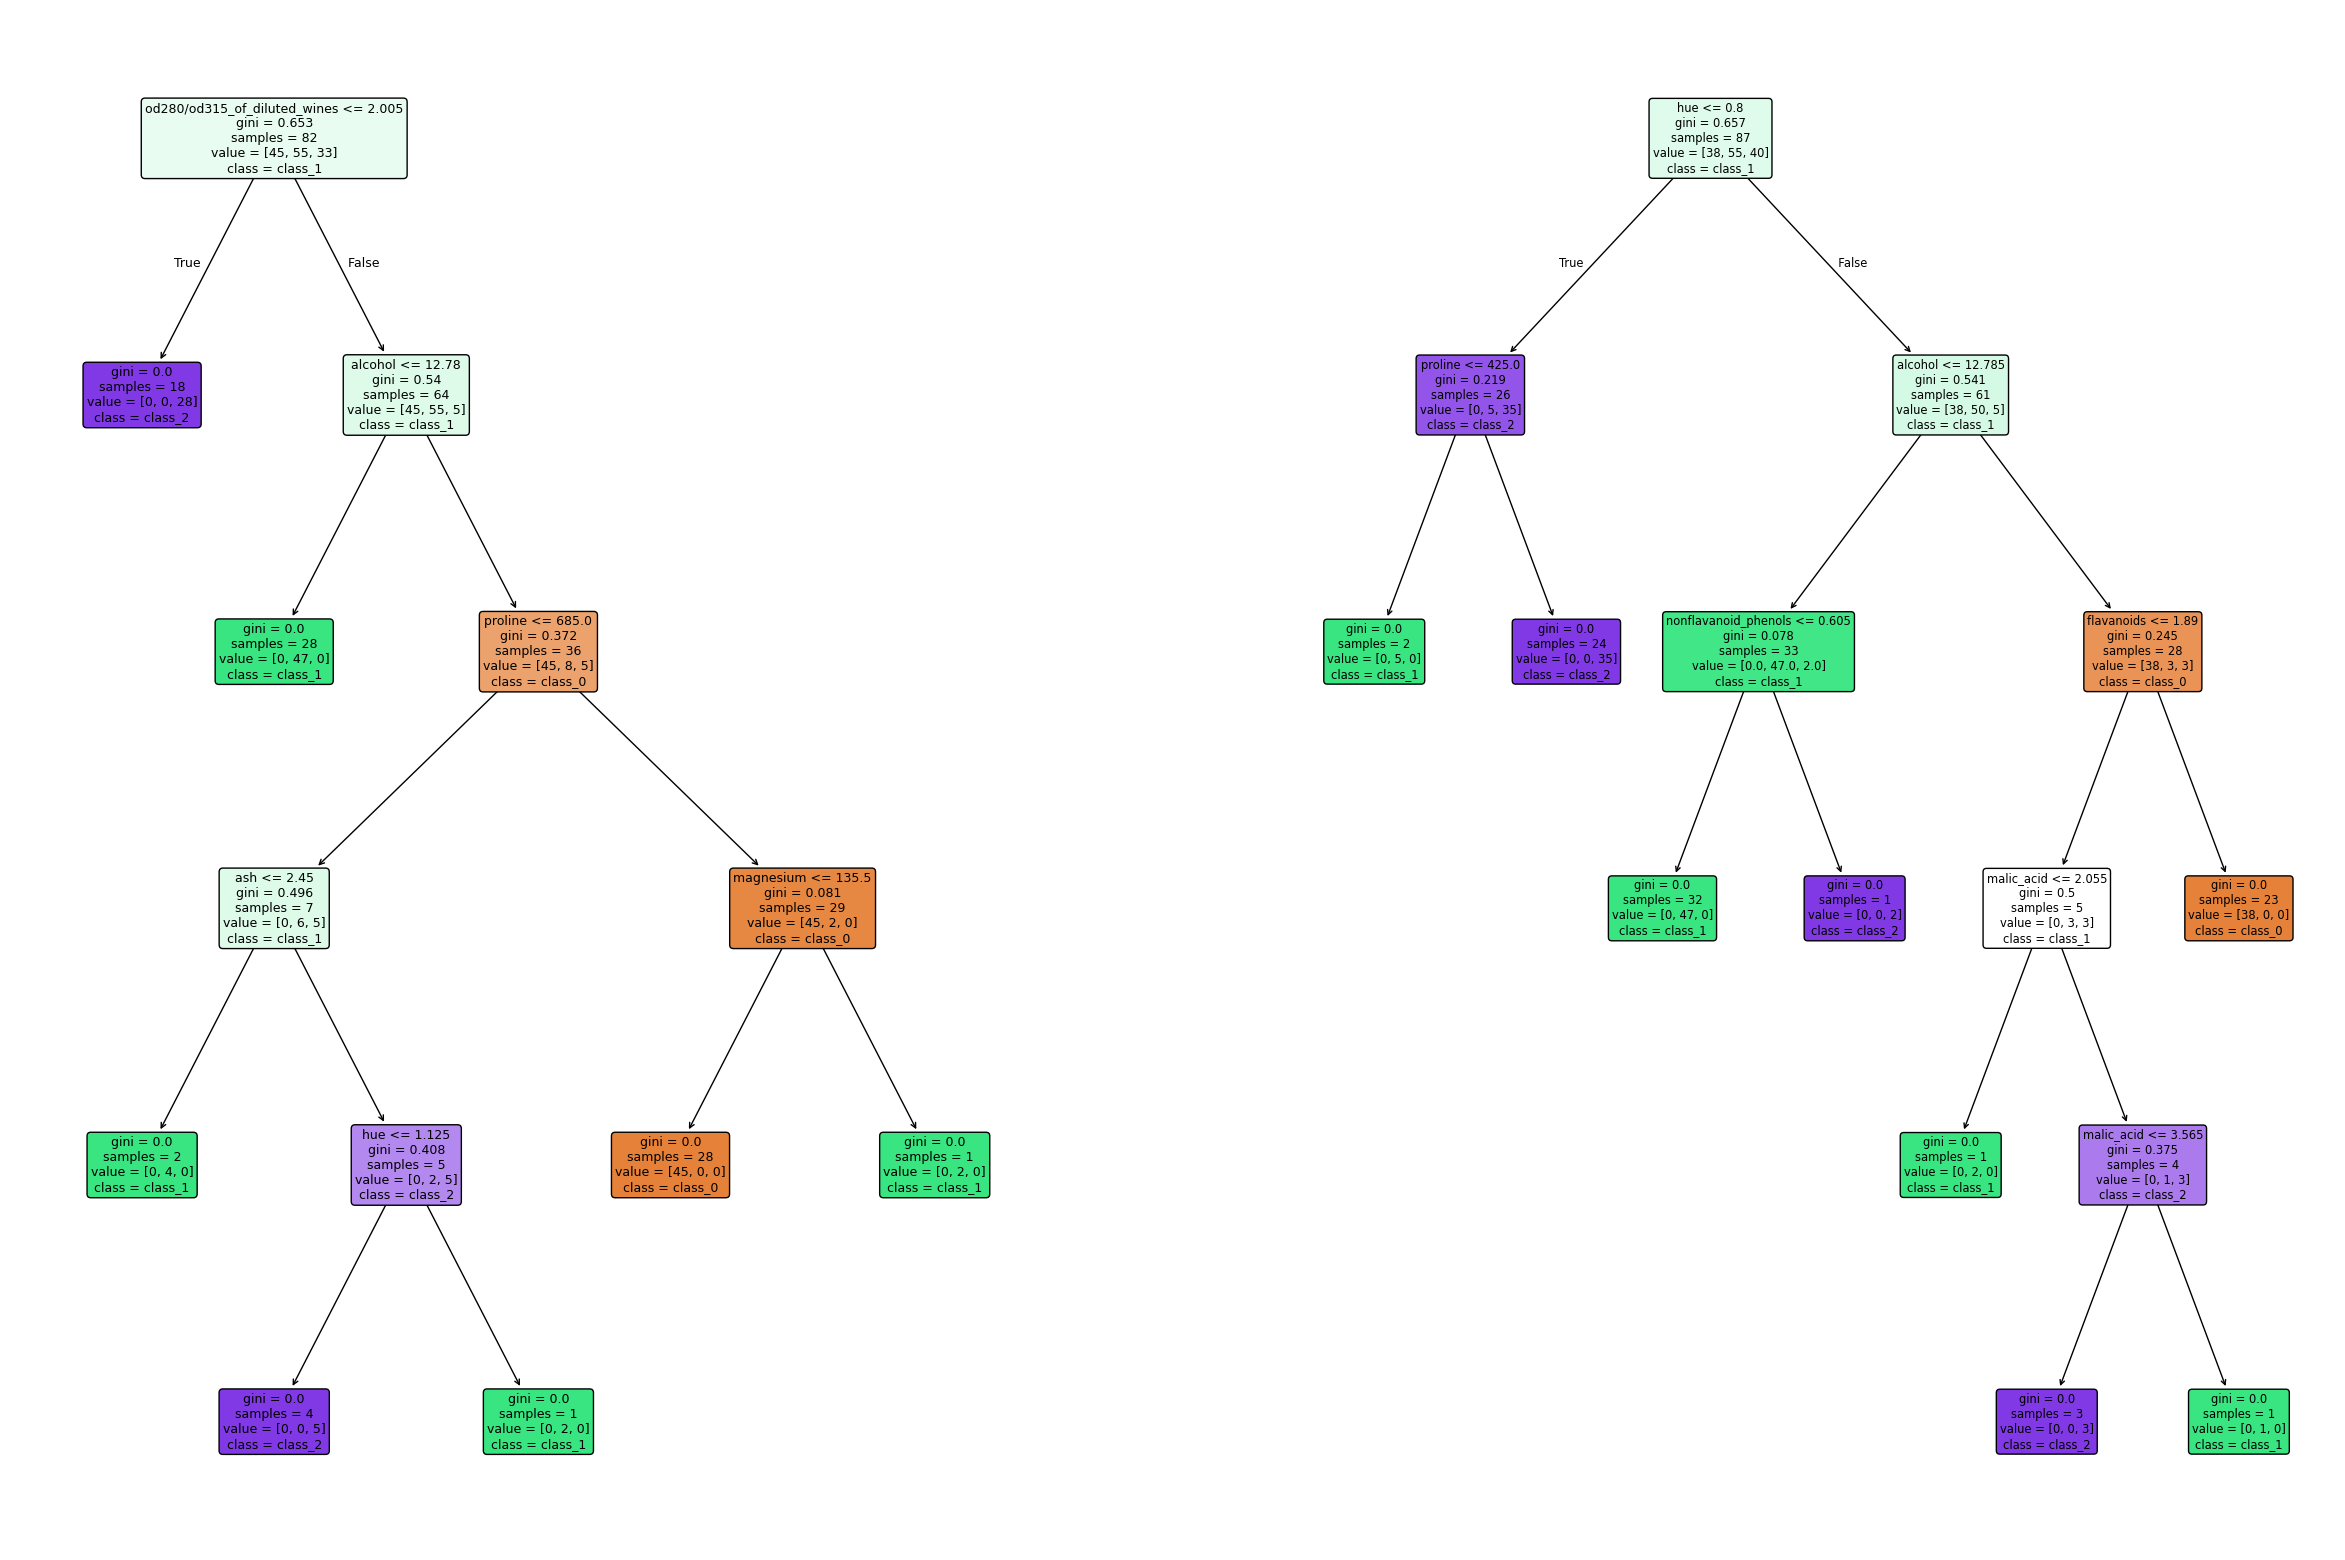

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [6]:
# Bucle, en este caso mostramos 2 de los 100 como anécodta
# el resultado será la mezcla de los 100, que aquí no se ve


fig, axes = plt.subplots(1,2, figsize=(30,20))

for i in range(len(axes)):
  fig = plt.figure()
  plot_tree(crf.estimators_[i],
            feature_names=wine_data.feature_names,
            class_names=wine_data.target_names,
            filled=True,
            impurity=True,
            rounded=True,
            ax=axes[i])
plt.show()

Precisión del clasificador

In [7]:
print("Precisión en conjunto de datos de entrenamiento: {:.3f}".format(crf.score(X_train, y_train)))
print("Precisión en el conjunto de datos de evaluación: {:.3f}".format(crf.score(X_test, y_test)))

Precisión en conjunto de datos de entrenamiento: 1.000
Precisión en el conjunto de datos de evaluación: 0.978


Matriz de confusión

In [8]:
print(confusion_matrix(y_test, crf.predict(X_test)))

[[15  0  0]
 [ 0 17  1]
 [ 0  0 12]]


### **Evaluación de la variación de características**

Vamos a evaluar el impacto en el número de muestras seleccionadas por bootstrap sample

In [ ]:
print('Número de muestras del entranamiento {}'.format(X_train.shape[0]))

In [9]:
# Generamos una lista con distinto número de muestras

n_samples = [0.1, 0.2, 0.3, 0.5, 0.8, 0.9] # sobre el numero de muestras: el 10%, 20% ...

acc_lst = []

# se evalua el classifier con cada porcentaje de muestra
# como se dice abajo Valores muy bajos pueden introducir sesgo. 
# Realmente se recomienda que estén en un rango de 60% 80%. Suele usarse el valor de 2/3 
for n in n_samples:

  # Generamos el clasificador
  crf_s = RandomForestClassifier(n_estimators=100, criterion='gini', max_features='sqrt' , max_samples=n, random_state=2)
  
  # Entrenamos
  crf_s.fit(X_train, y_train)
  acc_lst.append(crf_s.score(X_test, y_test))

acc_lst

[0.9555555555555556,
 0.9555555555555556,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777]

Valores muy bajos pueden introducir sesgo. Se recomienda que estén en un rango de 60% 80%. Suele usarse el valor de 2/3 

Ahora evaluamos el número de características empleadas en la generación de cada árbol

In [ ]:
print('Número de características {}'.format(X_train.shape[1]))

In [ ]:
# Generamos una lista con distinto número de características

n_samples = [0.1, 0.2, 0.3, 0.5, 0.8, 0.9]

acc_lst = []

for n in n_samples:

  # Generamos el clasificador
  crf_s = RandomForestClassifier(n_estimators=100, criterion='gini', max_features=n , max_samples=None, random_state=2)
  
  # Entrenamos
  crf_s.fit(X_train, y_train)
  acc_lst.append(crf_s.score(X_test, y_test))

acc_lst

TAREA: Clasificación Random Forest con dataset Titanic

1. Genera un modelo con el clasificador de Random Forest con los valores por defecto y compara los resultados con los clasificadores de Regresión logística y árbol de decisiones realizando el informe de clasificación.

2. Genera diferentes modelos del clasificador de Random Forest variando los parámetros más importantes. Analiza los resultados y razona si se ajustan al resultado esperado en función de los parámetros seleccionados.





